In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
data=pd.read_csv("C:\\env\\CA2(217&375)DATA.csv")
data.head()

,country,state,city,station,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
0,India,Andhra_Pradesh,Vijayawada,"Rajiv 0gar, Vijayawada - APPCB",2025-03-29 10:00:00,16.554731,80.64911,PM2.5,35,99,61
1,India,Andhra_Pradesh,Vijayawada,"Rajiv 0gar, Vijayawada - APPCB",2025-03-30 10:00:00,16.554731,80.64911,PM10,33,103,61
2,India,Andhra_Pradesh,Vijayawada,"Rajiv 0gar, Vijayawada - APPCB",2025-03-31 10:00:00,16.554731,80.64911,SO2,13,26,19
3,India,Andhra_Pradesh,Vijayawada,"Rajiv 0gar, Vijayawada - APPCB",2025-04-01 10:00:00,16.554731,80.64911,CO,2,55,45
4,India,Andhra_Pradesh,Visakhapat0m,"GVM Corporation, Visakhapat0m - APPCB",2025-04-02 10:00:00,17.720000,83.30000,NO2,44,68,55


In [7]:
display(data.describe())
display(data.info())

,latitude,longitude,pollutant_min,pollutant_max,pollutant_avg
count,3274.000000,3274.000000,3274.000000,3274.000000,3274.00000
mean,22.164980,78.761980,24.745877,71.574527,41.02413
std,5.610914,4.921388,28.209132,78.115065,43.80264
min,8.514909,70.909168,0.000000,0.000000,0.00000
25%,18.897756,75.638133,4.000000,14.000000,9.00000
50%,23.002657,77.482194,14.000000,47.000000,25.00000
75%,26.833997,80.699436,36.000000,103.000000,58.00000
max,34.066206,94.636574,211.000000,500.000000,323.00000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3274 entries, 0 to 3273
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        3274 non-null   object 
 1   state          3274 non-null   object 
 2   city           3274 non-null   object 
 3   station        3274 non-null   object 
 4   last_update    3274 non-null   object 
 5   latitude       3274 non-null   float64
 6   longitude      3274 non-null   float64
 7   pollutant_id   3274 non-null   object 
 8   pollutant_min  3274 non-null   int64  
 9   pollutant_max  3274 non-null   int64  
 10  pollutant_avg  3274 non-null   int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 281.5+ KB


None

In [10]:
data.isnull().sum()

country          0
state            0
city             0
station          0
last_update      0
latitude         0
longitude        0
pollutant_id     0
pollutant_min    0
pollutant_max    0
pollutant_avg    0
dtype: int64

In [8]:
data = data.dropna()
data.isnull().sum()

country          0
state            0
city             0
station          0
last_update      0
latitude         0
longitude        0
pollutant_id     0
pollutant_min    0
pollutant_max    0
pollutant_avg    0
dtype: int64

In [9]:
# Cell 6: Summary Statistics
data.describe(include='all')


,country,state,city,station,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
count,3274,3274,3274,3274,3274,3274.000000,3274.000000,3274,3274.000000,3274.000000,3274.00000
unique,1,33,256,493,3274,NaN,NaN,7,NaN,NaN,NaN
top,India,Maharashtra,Delhi,"New Malakpet, Hyderabad - TSPCB",2034-03-15 10:00:00,NaN,NaN,PM2.5,NaN,NaN,NaN
freq,3274,577,253,7,1,NaN,NaN,486,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,22.164980,78.761980,NaN,24.745877,71.574527,41.02413
std,NaN,NaN,NaN,NaN,NaN,5.610914,4.921388,NaN,28.209132,78.115065,43.80264
min,NaN,NaN,NaN,NaN,NaN,8.514909,70.909168,NaN,0.000000,0.000000,0.00000
25%,NaN,NaN,NaN,NaN,NaN,18.897756,75.638133,NaN,4.000000,14.000000,9.00000
50%,NaN,NaN,NaN,NaN,NaN,23.002657,77.482194,NaN,14.000000,47.000000,25.00000
75%,NaN,NaN,NaN,NaN,NaN,26.833997,80.699436,NaN,36.000000,103.000000,58.00000


In [10]:
# Cell 7: Unique Cities & Stations
print("Unique Cities:", data['city'].nunique())
print("Unique Stations:", data['station'].nunique())


Unique Cities: 256
Unique Stations: 493


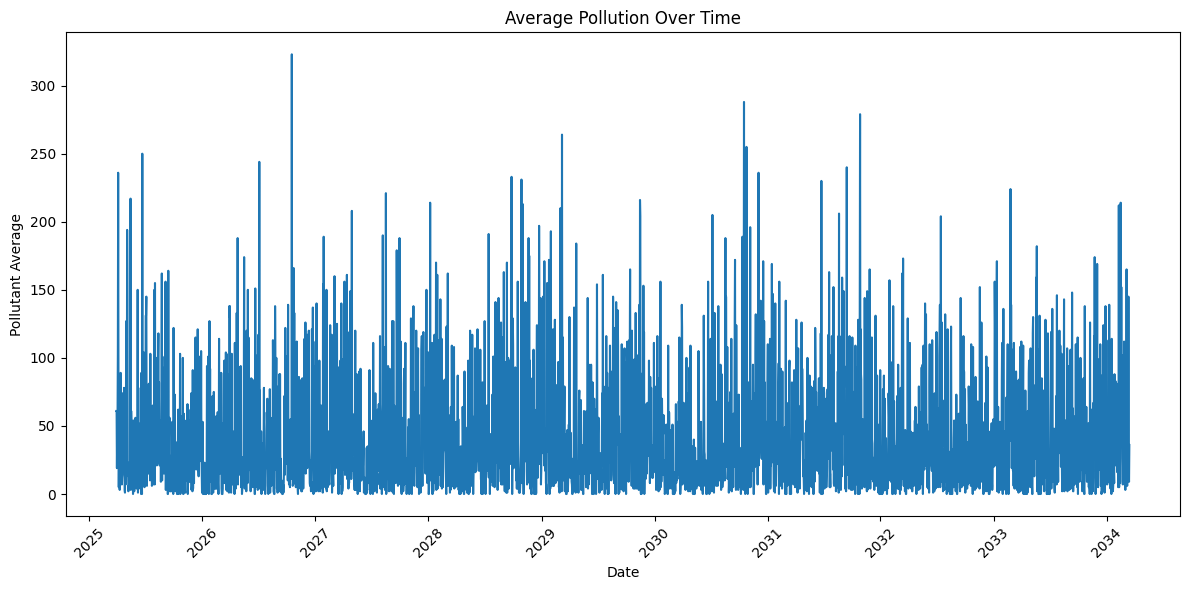

In [15]:
# Cell 8: Trend Analysis - Average Pollution Over Time
data['last_update'] = pd.to_datetime(data['last_update'])

pollution_trend = data.groupby(data['last_update'].dt.date)['pollutant_avg'].mean()

plt.figure(figsize=(12, 6))
pollution_trend.plot()
plt.title('Average Pollution Over Time')
plt.xlabel('Date')
plt.ylabel('Pollutant Average')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


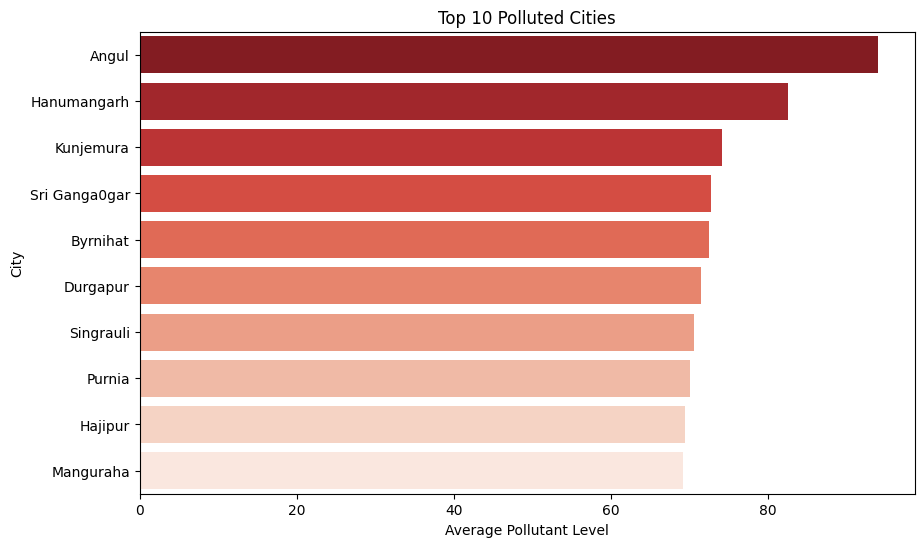

In [14]:
# Top Polluted Cities with custom colors (Fixed)

top_cities = data.groupby('city')['pollutant_avg'].mean().sort_values(ascending=False).head(10)
colors = sns.color_palette('Reds_r', len(top_cities))

plt.figure(figsize=(10, 6))
sns.barplot(x=top_cities.values, y=top_cities.index, palette=colors, hue=top_cities.index, dodge=False, legend=False)
plt.title('Top 10 Polluted Cities')
plt.xlabel('Average Pollutant Level')
plt.ylabel('City')
plt.show()


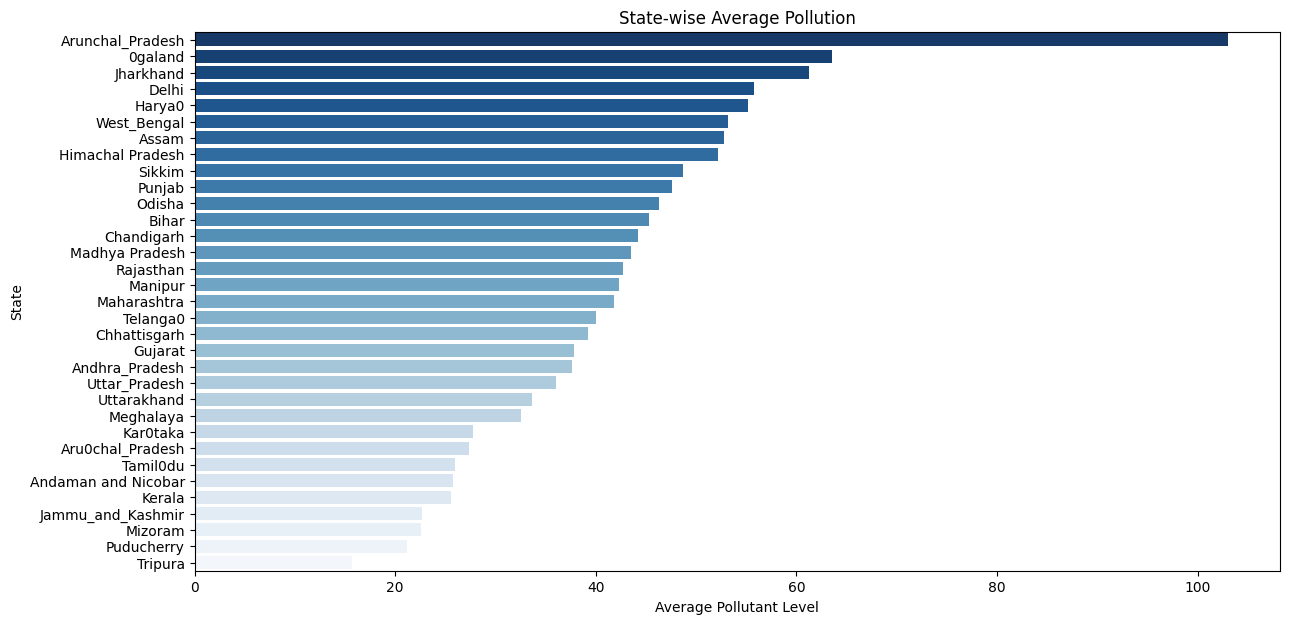

In [15]:
# Cell 10: State-wise Comparison (Fixed)

state_comparison = data.groupby('state')['pollutant_avg'].mean().sort_values(ascending=False)
colors = sns.color_palette('Blues_r', len(state_comparison))

plt.figure(figsize=(14, 7))
sns.barplot(x=state_comparison.values, y=state_comparison.index, palette=colors, hue=state_comparison.index, dodge=False, legend=False)
plt.title('State-wise Average Pollution')
plt.xlabel('Average Pollutant Level')
plt.ylabel('State')
plt.show()


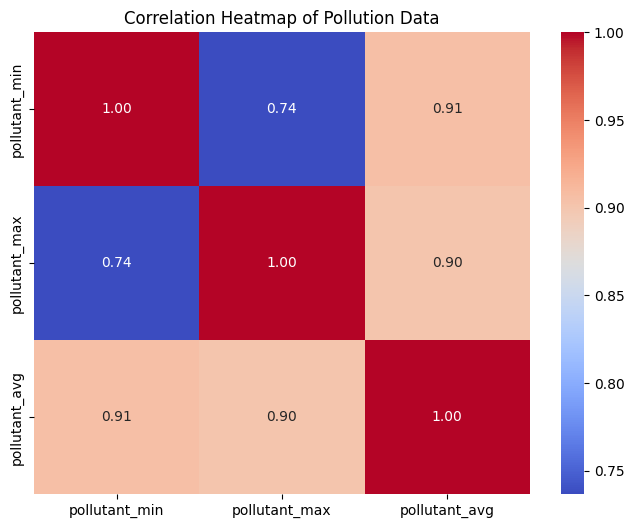

In [24]:
# Cell 11: Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data[['pollutant_min', 'pollutant_max', 'pollutant_avg']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Pollution Data')
plt.show()


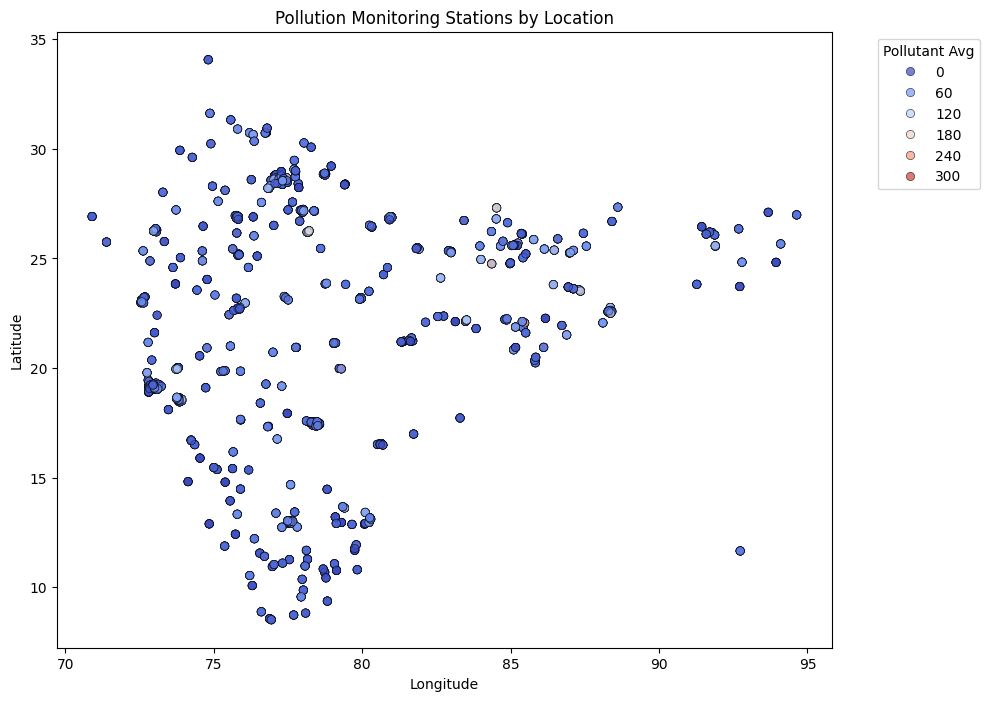

In [47]:
# Scatter plot of monitoring stations based on latitude and longitude
plt.figure(figsize=(10, 8))
sns.scatterplot(x='longitude', y='latitude', hue='pollutant_avg', data=data, palette='coolwarm', alpha=0.7, edgecolor='k')
plt.title('Pollution Monitoring Stations by Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Pollutant Avg', bbox_to_anchor=(1.05, 1), loc=2)
plt.show()


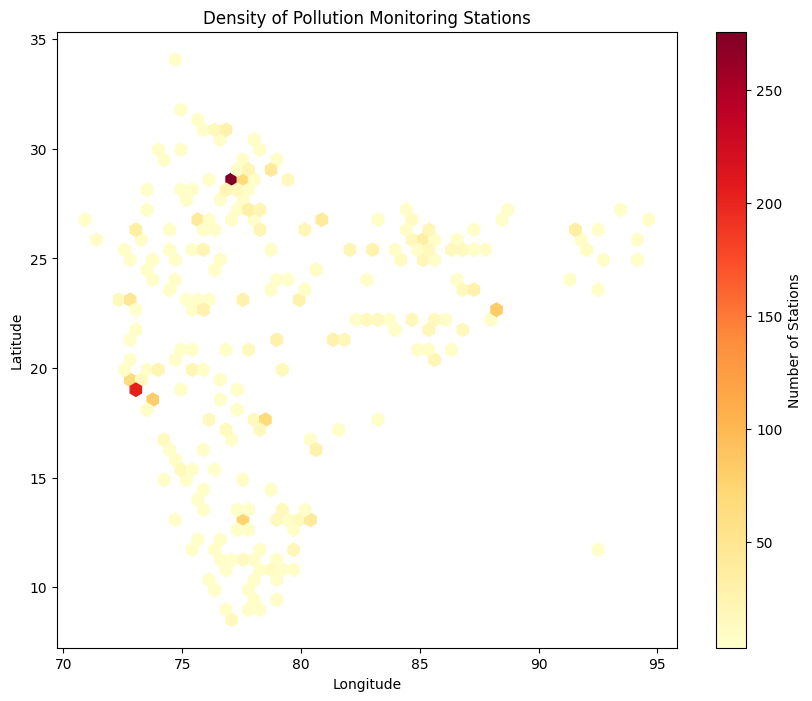

In [48]:
# Density map of stations using hexbin
plt.figure(figsize=(10, 8))
plt.hexbin(data['longitude'], data['latitude'], gridsize=50, cmap='YlOrRd', mincnt=1)
plt.colorbar(label='Number of Stations')
plt.title('Density of Pollution Monitoring Stations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


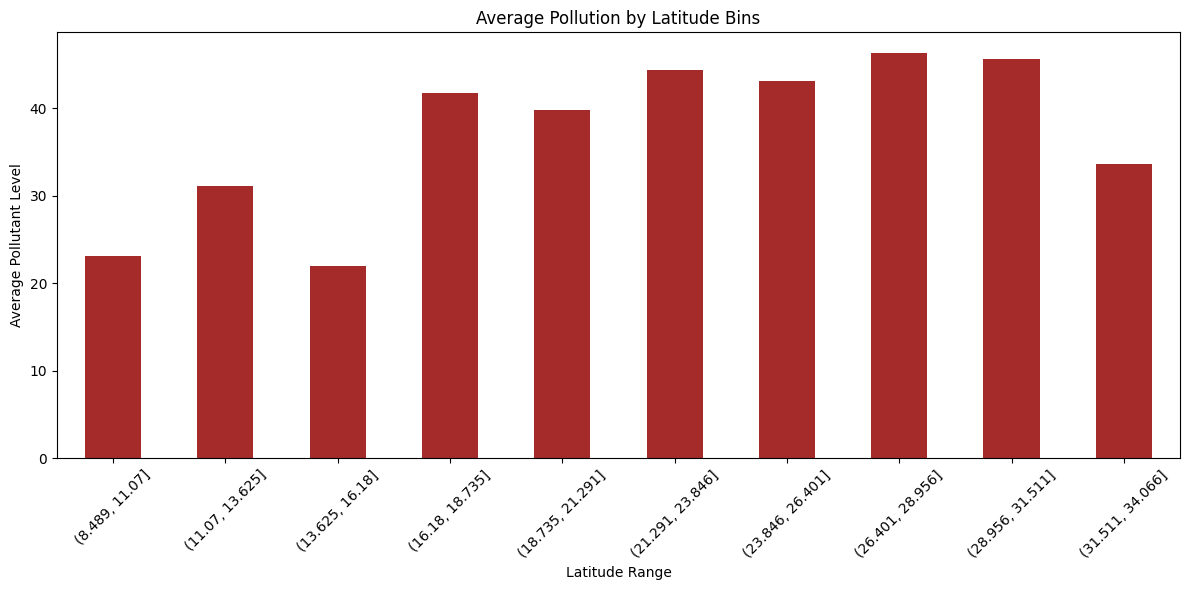

In [52]:
# Grouping latitudes into bins to see average pollution by region
data['latitude_bins'] = pd.cut(data['latitude'], bins=10)

# Average pollution by latitude bins (cleaned warning)
lat_pollution = data.groupby('latitude_bins', observed=False)['pollutant_avg'].mean()

# Plot
plt.figure(figsize=(12, 6))
lat_pollution.plot(kind='bar', color='brown')
plt.title('Average Pollution by Latitude Bins')
plt.xlabel('Latitude Range')
plt.ylabel('Average Pollutant Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


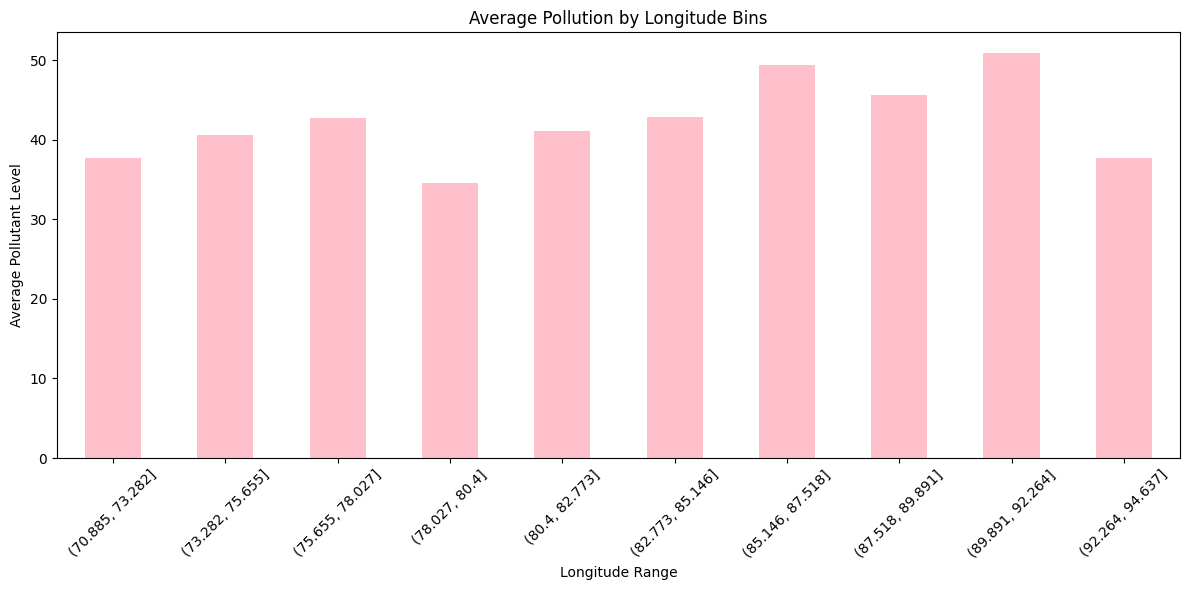

In [53]:
# Grouping longitudes into bins to see average pollution by region
data['longitude_bins'] = pd.cut(data['longitude'], bins=10)

# Average pollution by longitude bins (cleaned warning)
long_pollution = data.groupby('longitude_bins', observed=False)['pollutant_avg'].mean()

# Plot
plt.figure(figsize=(12, 6))
long_pollution.plot(kind='bar', color='pink')
plt.title('Average Pollution by Longitude Bins')
plt.xlabel('Longitude Range')
plt.ylabel('Average Pollutant Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


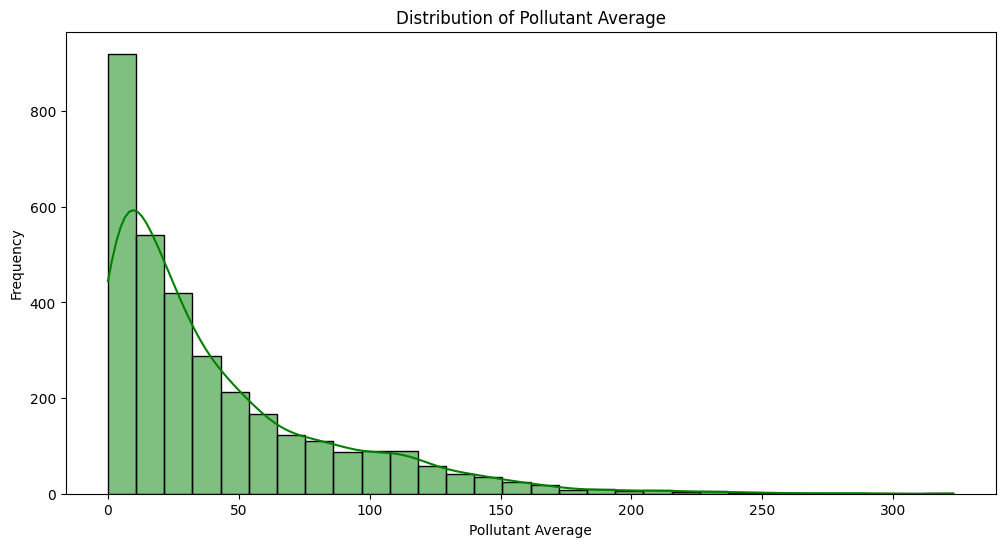

In [26]:
# Cell 12: Pollutant Distribution
plt.figure(figsize=(12, 6))
sns.histplot(data['pollutant_avg'], bins=30, kde=True, color='green')
plt.title('Distribution of Pollutant Average')
plt.xlabel('Pollutant Average')
plt.ylabel('Frequency')
plt.show()


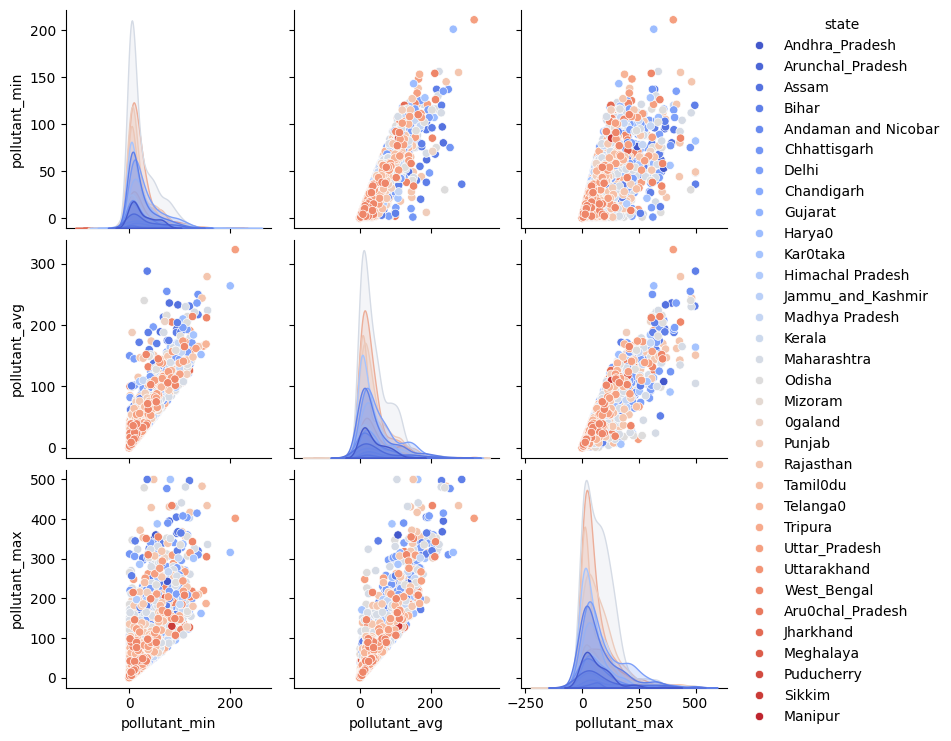

In [24]:
sns.pairplot(
    data[['pollutant_min', 'pollutant_avg', 'pollutant_max', 'state']],
    hue='state',
    palette='coolwarm'
)
plt.show()


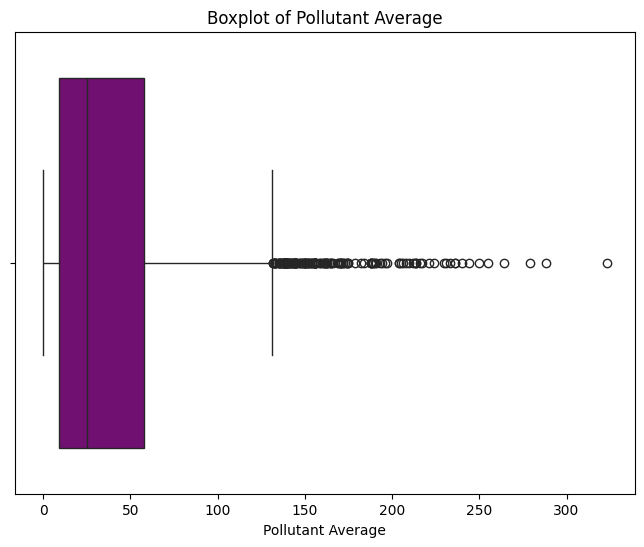

In [27]:
# Cell 13: Outlier Detection (Boxplot)
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['pollutant_avg'], color='purple')
plt.title('Boxplot of Pollutant Average')
plt.xlabel('Pollutant Average')
plt.show()


In [16]:
# Covariance matrix
cov_matrix = data[['pollutant_min', 'pollutant_max', 'pollutant_avg']].cov()

# Display covariance matrix
print("Covariance Matrix:")
print(cov_matrix)


Covariance Matrix:
               pollutant_min  pollutant_max  pollutant_avg
pollutant_min     795.755139    1623.186070    1119.436931
pollutant_max    1623.186070    6101.963433    3082.551363
pollutant_avg    1119.436931    3082.551363    1918.671278


In [17]:
print("Data Analysis Completed")
print("Total Records:", len(data))
print("Unique Cities:", data['city'].nunique())
print("Unique Stations:", data['station'].nunique())
print("Latitude Range:", (data['latitude'].min(), data['latitude'].max()))
print("Longitude Range:", (data['longitude'].min(), data['longitude'].max()))


Data Analysis Completed
Total Records: 3274
Unique Cities: 256
Unique Stations: 493
Latitude Range: (np.float64(8.5149093), np.float64(34.066206))
Longitude Range: (np.float64(70.909168), np.float64(94.636574))
